# Analysis of Police Shootings in US
## Zukhra Mazhitova 
## BD-1902


### Content
+ Introduction
+ Data description and objectives
+ Data preraration: cleaning and shaping
    + Identifying and dealing with null values
    + Preparation for scrapping
    + Scrapping

## 1. Introduction


In 2015, The Washington Post began to log every fatal shooting by an on-duty police officer in the United States. In that time there have been more than 5,000 such shootings recorded by The Post.

After Michael Brown, an unarmed Black man, was killed in 2014 by police in Ferguson, Mo., a Post investigation found that the FBI undercounted fatal police shootings by more than half. This is because reporting by police departments is voluntary and many departments fail to do so.

Another major event which occured on May 25, 2020, was death of murder of African-American man, George Floyd.  Floyd was arrested after allegedly passing a counterfeit $20 bill at a grocery store in the Powderhorn Park neighborhood of Minneapolis. He died after Derek Chauvin, a white police officer, pressed his knee to Floyd's neck for over eight minutes during the arrest. Floyd was handcuffed face down in the street, while two other officers further restrained Floyd and a fourth prevented onlookers from intervening. During the final two minutes, Floyd was motionless and had no pulse.Though the officers called for medical assistance, they took no action to treat him.

Floyd's death triggered worldwide protests against police brutality, police racism, and lack of police accountability. These incidents triggered the Black Lives Matter (BLM) movement which is a decentralized political and social movement advocating for non-violent civil disobedience in protest against incidents of police brutality and all racially motivated violence against black people.


Sources (https://www.washingtonpost.com/graphics/investigations/police-shootings-database/)


(https://en.wikipedia.org/wiki/George_Floyd#Death)



# 2.1 Data description and objectives



The Washinghton Post's data is mainly based on news accounts, social media postings and police reports. Review contains data of about 5,000 cases in last five years.

Chosen dataset of The Washington Post contains records of every fatal shooting in the United States by a police officer 

+ id: a unique identifiying number for each victim

+ name: the name of the killed person

+ date: the date of the shooting occured in YYYY-MM-DD format

+ manner_of_death: how the victim was

    + shot
    + shot and Tasered
    
+ armed:  whether victom had a some kind of gun or potentially threataning equipment, if so what king of arm.
    + undetermined: it is not known whether or not the victim had a weapon
    + unknown: the victim was armed, but it is not known what the object was
    + unarmed: the victim was not armed
+ age: the age of the victim

+ gender: the biological gender of the victim. 
    + M: Male
    + F: Female
    + None: unknown

+ race:
    + W: White, Caucasian
    + B: Black, 
    + A: Asian
    + N: Native American
    + H: Hispanic
    + O: Other
    + None: unknown

+ city: the place where the shooting occured. 

+ state: two-letter postal code abbreviation of the state 

+ signs of mental illness:  if victim had a history of mental health concerns, suicidal thoughts or suffered from  psychiatric illness.

+ threat_level: The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. 

+ flee: whether the victim was moving away from officers, if so how

    + Foot: running away
    + Car: getting away with police with transport 
    + Not fleeing: not resisting police officer


+ body_camera: if an officer was wearing a body camera which may contain some kind of information about the occured incident incident.

+ latitude and longitude: the location of the shooting expressed as WGS84 coordinates, geocoded from addresses. The coordinates are rounded to 3 decimal places, meaning they have a precision of about 80-100 meters within the contiguous U.S.

+ is_geocoding_exact: reflects the accuracy of the coordinates. true means that the coordinates are for the location of the shooting (within approximately 100 meters), while false means that coordinates are for the centroid of a larger region, such as the city or county where the shooting happened.


## 2.2 Objectives

+ Define whether there is correlation between shooting and the race of the victim
+ Find out if there is any specific region where shootings occured the most
+ Determine the average age, median, range of the ages of victims in order to specify in which group of age people are mostly dead from police attack  
+ Analyze the growth of number of incidents by year 
+ Determine if the gender of the victim is  c
+ Form an average characteristics of a person, who can be deadly shot by a police officer


## 3.Data preraration: cleaning and shaping


In [147]:
#importing all libraries that are neccessary
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [148]:
#reading the dataset from file
df=pd.read_csv('fatal-police-shootings-data.csv', parse_dates=["date"])

In [149]:
#dislpaying first 5 rows of dataset
df.head()

id                name       date   manner_of_death       armed   age  \
0   3          Tim Elliot 2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [150]:
#identifying record and column number
df.shape

(5645, 17)

## 3.1 Identifying and dealing with null values

After observing the dataset, first step to preparing for analysis is dealing with missing values. Firstly, I had to identify which columns have null values




In [151]:
#Calculating percentage of null values 
null_perc = df.isna().mean().round(4) * 100
null_perc

id                          0.00
name                        3.67
date                        0.00
manner_of_death             0.00
armed                       3.76
age                         4.45
gender                      0.02
race                       10.29
city                        0.00
state                       0.00
signs_of_mental_illness     0.00
threat_level                0.00
flee                        4.85
body_camera                 0.00
longitude                   4.84
latitude                    4.84
is_geocoding_exact          0.00
dtype: float64

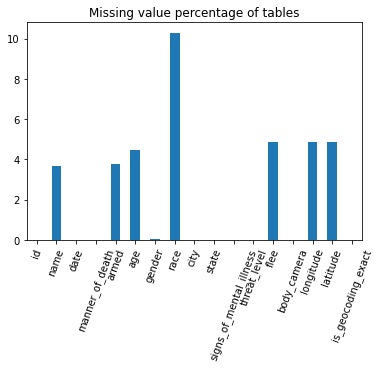

In [152]:
#Plotting the gpaph
null_perc.plot.bar(x="", y="", rot=70, title="Missing value percentage of tables")

plt.show(block=True);

From graph above it is alsolutely obvious that  7 columns out of 17 have missing values, and most of them are in race table.
    There is 
+ Get rid of (delete) the rows that have missing data
+ Get rid of (delete) the columns that have a high incidence of missing data
+ Add in a default value for the missing data

 null value treating techniques.


| Column with null value | Percentage of null value | Teqnique used to deal with null values | Reason
| --- | --- | --- | --- |
| name | 3.67 | Ignored | Column will not be used in analysis  |
| armed | 3.76 | Replaced with default value | One of the important columns, neither can be deleted as column nor ignored, also rows can not be deleted due to inconsistency of further analysis, therefore decided to replace null values with "unknown" |
| age | 4.45 | Replaced with default value  |  One of the important columns, neither can be deleted as column nor ignored, also rows can not be deleted due to inconsistency of further analysis, therefore decided to replace null values with "unknown"|
| gender | 0.02 |  Replaced with default value |One of the important columns, neither can be deleted as column nor ignored, also rows can not be deleted due to inconsistency of further analysis, therefore decided to replace null values with "unknown"|
| race | 10.29 | Replaced with default value  |  One of the important columns, neither can be deleted as column nor ignored, also rows can not be deleted due to inconsistency of further analysis, therefore decided to replace null values with "unknown"  |
| flee | 4.85 | Ignored |  Column will not be used in analysis  |
| longitude | 4.84 | Scrapped | Important column and can be scrapped|
| latitude | 4.84 | Scrapped | Important column and can be scrapped |

In [153]:
#Replacing null values
df["race"].fillna("unknown", inplace = True) 
df["age"].fillna("unknown", inplace = True) 
df["armed"].fillna("unknown", inplace = True)
df["gender"].fillna("unknown", inplace = True) 


## 3.2 Preparation for scrapping

  In order to deal with null values in 'longitude' and 'latitude' columns it was decided to scrap these values by their city and state. The first step to scrap is the preparation. Main task is to form a new dataset with the name of cities and states which he have to scrap coordinates for. 

In [156]:
#Identifying indexes and addinng them to list where longitude colum's value iis null
city_state = df[df['longitude'].isnull()].index.tolist()
#Converting this list to array 
city_state_arr=np.asarray(city_state)
#Slicing data frame by the indexes and selecting id, city and state columns and creating new dataframe
city_state_df = pd.DataFrame(df.iloc[city_state_arr,[0,8,9]].values, columns=["id","City","State"])
#Printing first 5 values of the dataset
city_state_df.head()


id                 City State
0  1552  Chesterfield County    SC
1  1556            Flagstaff    AZ
2  1555               Oxford    MA
3  1572              Solvang    CA
4  1586               Newnan    GA

In [157]:
#Checking if dataframe is formed correctly with all the values
city_state_df.shape

(273, 3)

## 3.3 Scrapping


In [133]:
from opencage.geocoder import OpenCageGeocode
#api
key = "ddceeb80069e48238d2148fe2ee03a1a"

geocoder = OpenCageGeocode(key)

In [158]:
#creating empty lists 

latitude_list = []  

longitude_list = []

 # iterating over rows in dataframe

for index, row in city_state_df.iterrows():

    City = row['City']
    State = row['State']       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    
#appending values to the list
    latitude_list.append(lat)
    longitude_list.append(long)


# create new columns from lists    
city_state_df['longitude'] = longitude_list

city_state_df['latitude'] = latitude_list   



#printing the dataset
city_state_df.head()

id                 City State   longitude   latitude
0  1552  Chesterfield County    SC  -80.141784  34.650058
1  1556            Flagstaff    AZ -111.651823  35.198752
2  1555               Oxford    MA  -71.859289  42.133631
3  1572              Solvang    CA -120.139089  34.595857
4  1586               Newnan    GA  -84.799657  33.380672

In [159]:
#converting datatype of id column to integer
city_state_df=city_state_df.astype({'id': 'int64'})
#rounding latitude and longitude
decimals = 3   
city_state_df['longitude'] = city_state_df['longitude'].apply(lambda x: round(x, decimals))
city_state_df['latitude'] = city_state_df['latitude'].apply(lambda x: round(x, decimals))
#dropping city and state because it would be inconvient to merge to original dataset
city_state_df=city_state_df.drop(['City', 'State'], axis=1)
city_state_df.head()

id  longitude  latitude
0  1552    -80.142    34.650
1  1556   -111.652    35.199
2  1555    -71.859    42.134
3  1572   -120.139    34.596
4  1586    -84.800    33.381

In [160]:
#Combining two datasets by the common id column
df =df.set_index("id").combine_first(city_state_df.set_index("id")).reset_index()
df.head()

id age       armed  body_camera           city       date         flee  \
0   3  53         gun        False        Shelton 2015-01-02  Not fleeing   
1   4  47         gun        False          Aloha 2015-01-02  Not fleeing   
2   5  23     unarmed        False        Wichita 2015-01-03  Not fleeing   
3   8  32  toy weapon        False  San Francisco 2015-01-04  Not fleeing   
4   9  39    nail gun        False          Evans 2015-01-04  Not fleeing   

  gender  is_geocoding_exact  latitude  longitude   manner_of_death  \
0      M                True    47.247   -123.122              shot   
1      M                True    45.487   -122.892              shot   
2      M                True    37.695    -97.281  shot and Tasered   
3      M                True    37.763   -122.422              shot   
4      M                True    40.384   -104.692              shot   

                 name race  signs_of_mental_illness state threat_level  
0          Tim Elliot    A                     True    WA       attack  
1    Lewis Lee Lembke    W                    False    OR       attack  
2  John Paul Quintero    H                    False    KS        other  
3     Matthew Hoffman    W                     True    CA       attack  
4   Michael Rodriguez    H                    False    CO       attack

In [161]:
#After combining columns were sorted alphabetically, so we have to change columns order to convinient one
df = df[['id', 'name','date','manner_of_death','armed','age','gender','race','city','state','signs_of_mental_illness','threat_level','flee','body_camera','longitude','latitude','is_geocoding_exact']]
df.head()


id                name       date   manner_of_death       armed age gender  \
0   3          Tim Elliot 2015-01-02              shot         gun  53      M   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun  47      M   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed  23      M   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon  32      M   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun  39      M   

  race           city state  signs_of_mental_illness threat_level  \
0    A        Shelton    WA                     True       attack   
1    W          Aloha    OR                    False       attack   
2    H        Wichita    KS                    False        other   
3    W  San Francisco    CA                     True       attack   
4    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [163]:
#Obtaining information about dataset in order to check if null values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5645 entries, 0 to 5644
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5645 non-null   int64         
 1   name                     5438 non-null   object        
 2   date                     5645 non-null   datetime64[ns]
 3   manner_of_death          5645 non-null   object        
 4   armed                    5645 non-null   object        
 5   age                      5645 non-null   object        
 6   gender                   5645 non-null   object        
 7   race                     5645 non-null   object        
 8   city                     5645 non-null   object        
 9   state                    5645 non-null   object        
 10  signs_of_mental_illness  5645 non-null   bool          
 11  threat_level             5645 non-null   object        
 12  flee                     5371 non-

In [164]:
#displaying all the rows of the column
pd.set_option('display.max_rows', None)
df

id                              name       date   manner_of_death  \
0        3                        Tim Elliot 2015-01-02              shot   
1        4                  Lewis Lee Lembke 2015-01-02              shot   
2        5                John Paul Quintero 2015-01-03  shot and Tasered   
3        8                   Matthew Hoffman 2015-01-04              shot   
4        9                 Michael Rodriguez 2015-01-04              shot   
5       11                 Kenneth Joe Brown 2015-01-04              shot   
6       13               Kenneth Arnold Buck 2015-01-05              shot   
7       15                     Brock Nichols 2015-01-06              shot   
8       16                     Autumn Steele 2015-01-06              shot   
9       17                   Leslie Sapp III 2015-01-06              shot   
10      19                    Patrick Wetter 2015-01-06  shot and Tasered   
11      20                  Jessie Hernandez 2015-01-26              shot   
12      21                         Ron Sneed 2015-01-07              shot   
13      22    Hashim Hanif Ibn Abdul-Rasheed 2015-01-07              shot   
14      25            Nicholas Ryan Brickman 2015-01-07              shot   
15      27  Omarr Julian Maximillian Jackson 2015-01-07              shot   
16      29                     Loren Simpson 2015-01-08              shot   
17      32               James Dudley Barker 2015-01-08              shot   
18      36               Artago Damon Howard 2015-01-08              shot   
19      37                      Thomas Hamby 2015-01-08              shot   
20      38                     Jimmy Foreman 2015-01-09              shot   
21      42                       Tommy Smith 2015-01-11              shot   
22      43                    Brian  Barbosa 2015-01-11              shot   
23      45                 Salvador Figueroa 2015-01-11  shot and Tasered   
24      46               John Edward O'Keefe 2015-01-13              shot   
25      48                 Richard McClendon 2015-01-13              shot   
26      49                     Marcus Golden 2015-01-14              shot   
27      50                    Michael Goebel 2015-01-14              shot   
28      51                      Mario Jordan 2015-01-14              shot   
29      52                  Talbot Schroeder 2015-01-14              shot   
30      54                    Robert Edwards 2015-01-14              shot   
31      55                Jeffrey R. Nielson 2015-01-14              shot   
32      56                      Donte Sowell 2015-01-15              shot   
33      57               Kavonda Earl Payton 2015-01-15              shot   
34      60                Quincy Reed Reindl 2015-01-15              shot   
35      63                         Jose Ceja 2015-01-15              shot   
36      64                     Nathan Massey 2015-01-15              shot   
37      67                        Scott Hall 2015-01-16              shot   
38      68                     Zaki Shinwary 2015-01-16  shot and Tasered   
39      74                    Terence Walker 2015-01-17              shot   
40      75                        Pablo Meza 2015-01-17              shot   
41      78                    Daniel Brumley 2015-01-17              shot   
42      80                 Jonathan Guillory 2015-01-18              shot   
43      83                     Carter Castle 2015-01-18  shot and Tasered   
44      84                     Paul Campbell 2015-01-19              shot   
45      85                      Dewayne Carr 2015-01-20              shot   
46      86                  Todd Allen Hodge 2015-01-21              shot   
47      88  Miguel Angel de Santos-Rodriguez 2015-01-21              shot   
48      90                      Isaac Holmes 2015-01-21              shot   
49      98                       Andrew Toto 2015-01-21              shot   
50      99                       Tiano Meton 2015-01-22              shot   
51  